<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets as datasets
from sklearn import model_selection as ms
import matplotlib.pyplot as plt
import numpy as np

In [3]:
random_seed = 1534

In [17]:
## TASK: Play with different class_sep parameters, how does the model accuracy degrade/improve?
dataset = datasets.make_classification(n_samples=1000, n_features=4, random_state=random_seed, class_sep=1.0)

In [18]:
features, labels = dataset
print(features.shape)

(1000, 4)


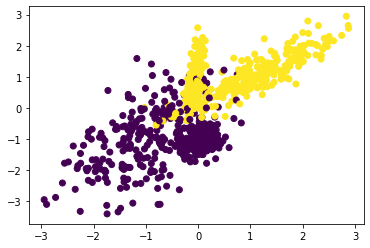

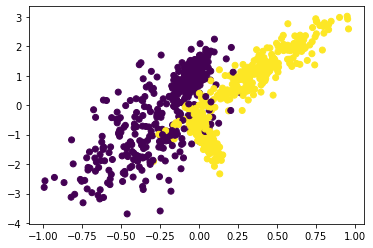

In [19]:
plt.scatter(features[:,0],features[:,1], c=labels)
plt.show()
plt.scatter(features[:,2],features[:,3], c=labels)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = ms.train_test_split(features,labels, test_size = 0.2)

In [21]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (800, 4)
y_train: (800,)
X_test: (200, 4)
y_test: (200,)


In [22]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
basic_model = Sequential()

In [24]:


# Adding layers to the model
# First layers: 16 neurons/perceptrons that takes the input and uses Leaky ReLU activation function.

basic_model.add(Dense(units = 4 , activation = 'LeakyReLU', input_shape = (4,))) 
# Second layer: 1 neuron/perceptron that takes the input from the 1st layers and gives output as 0 or 1.Activation used is 'Hard Sigmoid'

# TASK: Can you change the output to be probabilistic (probability for each class) by using 'softmax' as an activation function?
basic_model.add(Dense(1, activation = 'hard_sigmoid'))



In [25]:
# TASK optional): How does the Adam optimizer work? 
opt = keras.optimizers.Adam(learning_rate=0.01)
#TASK: What is binary cross entropy? What does it measure?
basic_model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])


In [26]:
# TASK: add validation data (https://keras.io/api/models/model_training_apis/)
basic_model.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.7962
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.9337
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9337
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.2055 - accuracy: 0.9362
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9425
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9425
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9438
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1972 - accuracy: 0.9425
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1942 - accuracy: 0.9438
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.1920 - accuracy: 0.9438
Epoch 11/50
25/25 [

In [27]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

7/7 [==============================] - 0s 2ms/step - loss: 0.2437 - accuracy: 0.9600
Loss =  0.24372290074825287
Accuracy =  0.9599999785423279


In [ ]:
#TASK: create an ROC plot! compute AUROC